In [19]:
import json
import numpy as np
import matplotlib.pyplot as plt



In [20]:
# Convert back the keys after loading the JSON (restore original types)
def convert_keys_from_string(d):
    new_dict = {}
    for key, value in d.items():
        # Example: converting back to int, but can be customized for tuples, etc.
        if key.isdigit():  # You can add more sophisticated type checks
            new_dict[int(key)] = value
        else:
            new_dict[key] = value
    return new_dict

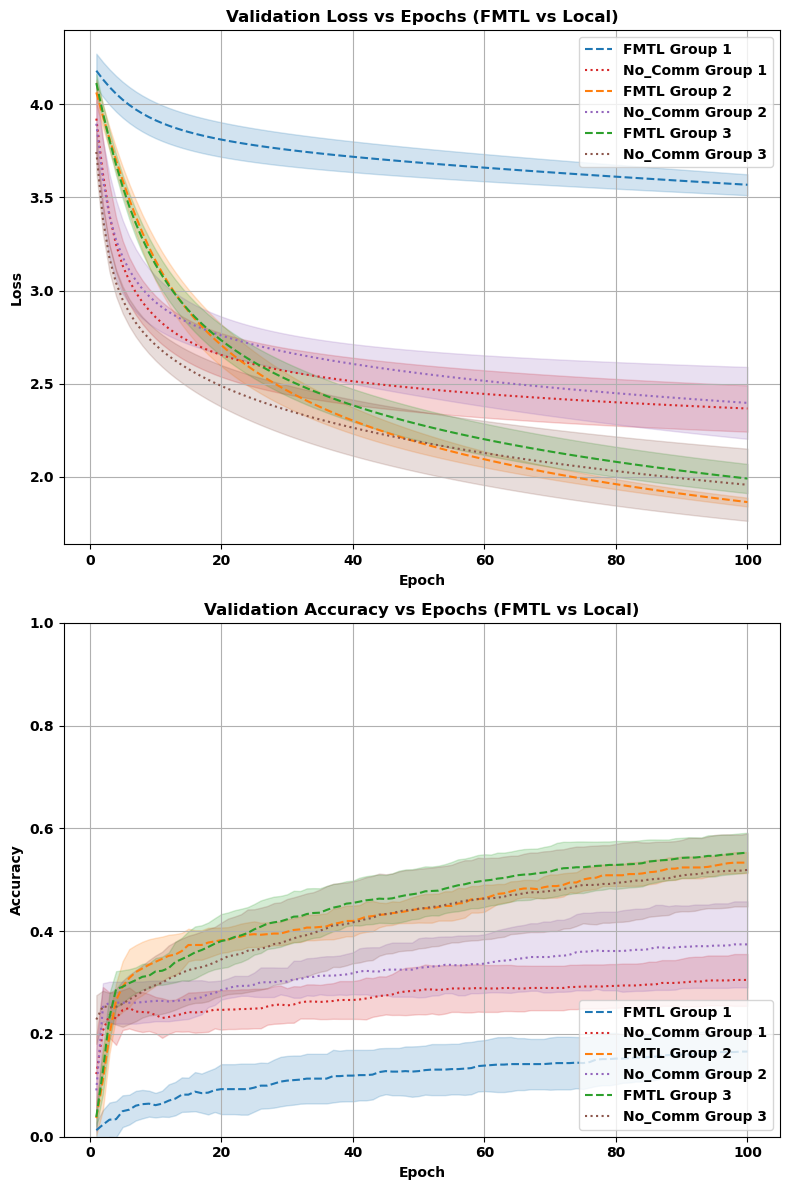

In [15]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Define the path to the metrics files
metrics_directory = "./"
fmtl_metrics_file = f'{metrics_directory}FMTL_metrics_New_graph_0_2_FL_random_P.json'
#no_comm_metrics_file = f'{metrics_directory}No_Comm_Metrics_20_FL.json'
no_comm_metrics_file = f'{metrics_directory}No_Comm_Metrics_20.json'

# Load the metrics from both JSON files
with open(fmtl_metrics_file, 'r') as f:
    fmtl_metrics = json.load(f)

with open(no_comm_metrics_file, 'r') as f:
    no_comm_metrics = json.load(f)

# Convert metrics to numpy arrays for easy manipulation
fmtl_group_train_loss_histories = {k: np.array(v) for k, v in fmtl_metrics['group_train_loss_mean'].items()}
fmtl_group_train_accuracy_histories = {k: np.array(v) for k, v in fmtl_metrics['group_train_acc_mean'].items()}
fmtl_group_val_loss_histories = {k: np.array(v) for k, v in fmtl_metrics['group_val_loss_mean'].items()}
fmtl_group_val_accuracy_histories = {k: np.array(v) for k, v in fmtl_metrics['group_val_acc_mean'].items()}

no_comm_group_train_loss_histories = {k: np.array(v) for k, v in no_comm_metrics['group_train_loss_mean'].items()}
no_comm_group_train_accuracy_histories = {k: np.array(v) for k, v in no_comm_metrics['group_train_acc_mean'].items()}
no_comm_group_val_loss_histories = {k: np.array(v) for k, v in no_comm_metrics['group_val_loss_mean'].items()}
no_comm_group_val_accuracy_histories = {k: np.array(v) for k, v in no_comm_metrics['group_val_acc_mean'].items()}

# Now load std values directly from the dictionary
fmtl_group_train_loss_std = {k: np.array(v) for k, v in fmtl_metrics['group_train_loss_std'].items()}
fmtl_group_val_loss_std = {k: np.array(v) for k, v in fmtl_metrics['group_val_loss_std'].items()}
fmtl_group_train_acc_std = {k: np.array(v) for k, v in fmtl_metrics['group_train_acc_std'].items()}
fmtl_group_val_acc_std = {k: np.array(v) for k, v in fmtl_metrics['group_val_acc_std'].items()}

no_comm_group_train_loss_std = {k: np.array(v) for k, v in no_comm_metrics['group_train_loss_std'].items()}
no_comm_group_val_loss_std = {k: np.array(v) for k, v in no_comm_metrics['group_val_loss_std'].items()}
no_comm_group_train_acc_std = {k: np.array(v) for k, v in no_comm_metrics['group_train_acc_std'].items()}
no_comm_group_val_acc_std = {k: np.array(v) for k, v in no_comm_metrics['group_val_acc_std'].items()}

# Combined Plot for FMTL and No_Comm Modalities
plt.figure(figsize=(8, 12))

# Loss Plot (Training Loss)
'''
plt.subplot(2, 2, 1)
for group in ['1', '2', '3']:
    # Plot FMTL
    plt.plot(range(1, len(fmtl_group_train_loss_histories[group]) + 1), fmtl_group_train_loss_histories[group], label=f"FMTL Group {group}", color=f'C{int(group)-1}')
    plt.fill_between(range(1, len(fmtl_group_train_loss_histories[group]) + 1), 
                     fmtl_group_train_loss_histories[group] - fmtl_group_train_loss_std[group], 
                     fmtl_group_train_loss_histories[group] + fmtl_group_train_loss_std[group], 
                     alpha=0.2, color=f'C{int(group)-1}')
    
    # Plot No_Comm
    plt.plot(range(1, len(no_comm_group_train_loss_histories[group]) + 1), no_comm_group_train_loss_histories[group], label=f"No_Comm Group {group}", linestyle="dotted", color=f'C{int(group)+2}')
    plt.fill_between(range(1, len(no_comm_group_train_loss_histories[group]) + 1), 
                     no_comm_group_train_loss_histories[group] - no_comm_group_train_loss_std[group], 
                     no_comm_group_train_loss_histories[group] + no_comm_group_train_loss_std[group], 
                     alpha=0.2, color=f'C{int(group)+2}')

plt.title("Training Loss vs Epochs (FMTL vs Local)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='upper right')
plt.grid()
'''

# Loss Plot (Validation Loss)
plt.subplot(2, 1, 1)
for group in ['1', '2', '3']:
    # Plot FMTL
    plt.plot(range(1, len(fmtl_group_val_loss_histories[group]) + 1), fmtl_group_val_loss_histories[group], label=f"FMTL Group {group}", linestyle="dashed", color=f'C{int(group)-1}')
    plt.fill_between(range(1, len(fmtl_group_val_loss_histories[group]) + 1), 
                     fmtl_group_val_loss_histories[group] - fmtl_group_val_loss_std[group], 
                     fmtl_group_val_loss_histories[group] + fmtl_group_val_loss_std[group], 
                     alpha=0.2, color=f'C{int(group)-1}')
    
    # Plot No_Comm
    plt.plot(range(1, len(no_comm_group_val_loss_histories[group]) + 1), no_comm_group_val_loss_histories[group], label=f"No_Comm Group {group}", linestyle="dotted", color=f'C{int(group)+2}')
    plt.fill_between(range(1, len(no_comm_group_val_loss_histories[group]) + 1), 
                     no_comm_group_val_loss_histories[group] - no_comm_group_val_loss_std[group], 
                     no_comm_group_val_loss_histories[group] + no_comm_group_val_loss_std[group], 
                     alpha=0.2, color=f'C{int(group)+2}')

plt.title("Validation Loss vs Epochs (FMTL vs Local)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='upper right')
plt.grid()


# Accuracy Plot (Validation Accuracy)
plt.subplot(2, 1, 2)
for group in ['1', '2', '3']:
    # Plot FMTL
    plt.plot(range(1, len(fmtl_group_val_accuracy_histories[group]) + 1), fmtl_group_val_accuracy_histories[group], label=f"FMTL Group {group}", linestyle="dashed", color=f'C{int(group)-1}')
    plt.fill_between(range(1, len(fmtl_group_val_accuracy_histories[group]) + 1), 
                     fmtl_group_val_accuracy_histories[group] - fmtl_group_val_acc_std[group], 
                     fmtl_group_val_accuracy_histories[group] + fmtl_group_val_acc_std[group], 
                     alpha=0.2, color=f'C{int(group)-1}')
    
    # Plot No_Comm
    plt.plot(range(1, len(no_comm_group_val_accuracy_histories[group]) + 1), no_comm_group_val_accuracy_histories[group], label=f"No_Comm Group {group}", linestyle="dotted", color=f'C{int(group)+2}')
    plt.fill_between(range(1, len(no_comm_group_val_accuracy_histories[group]) + 1), 
                     no_comm_group_val_accuracy_histories[group] - no_comm_group_val_acc_std[group], 
                     no_comm_group_val_accuracy_histories[group] + no_comm_group_val_acc_std[group], 
                     alpha=0.2, color=f'C{int(group)+2}')

plt.title("Validation Accuracy vs Epochs (FMTL vs Local)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0, 1])  # Ensure y-axis is between 0 and 1 for accuracy
plt.legend(loc='lower right')
plt.grid()

plt.tight_layout()
#plt.savefig('validation_acc_loss_FMTL_Local.png')
plt.show()


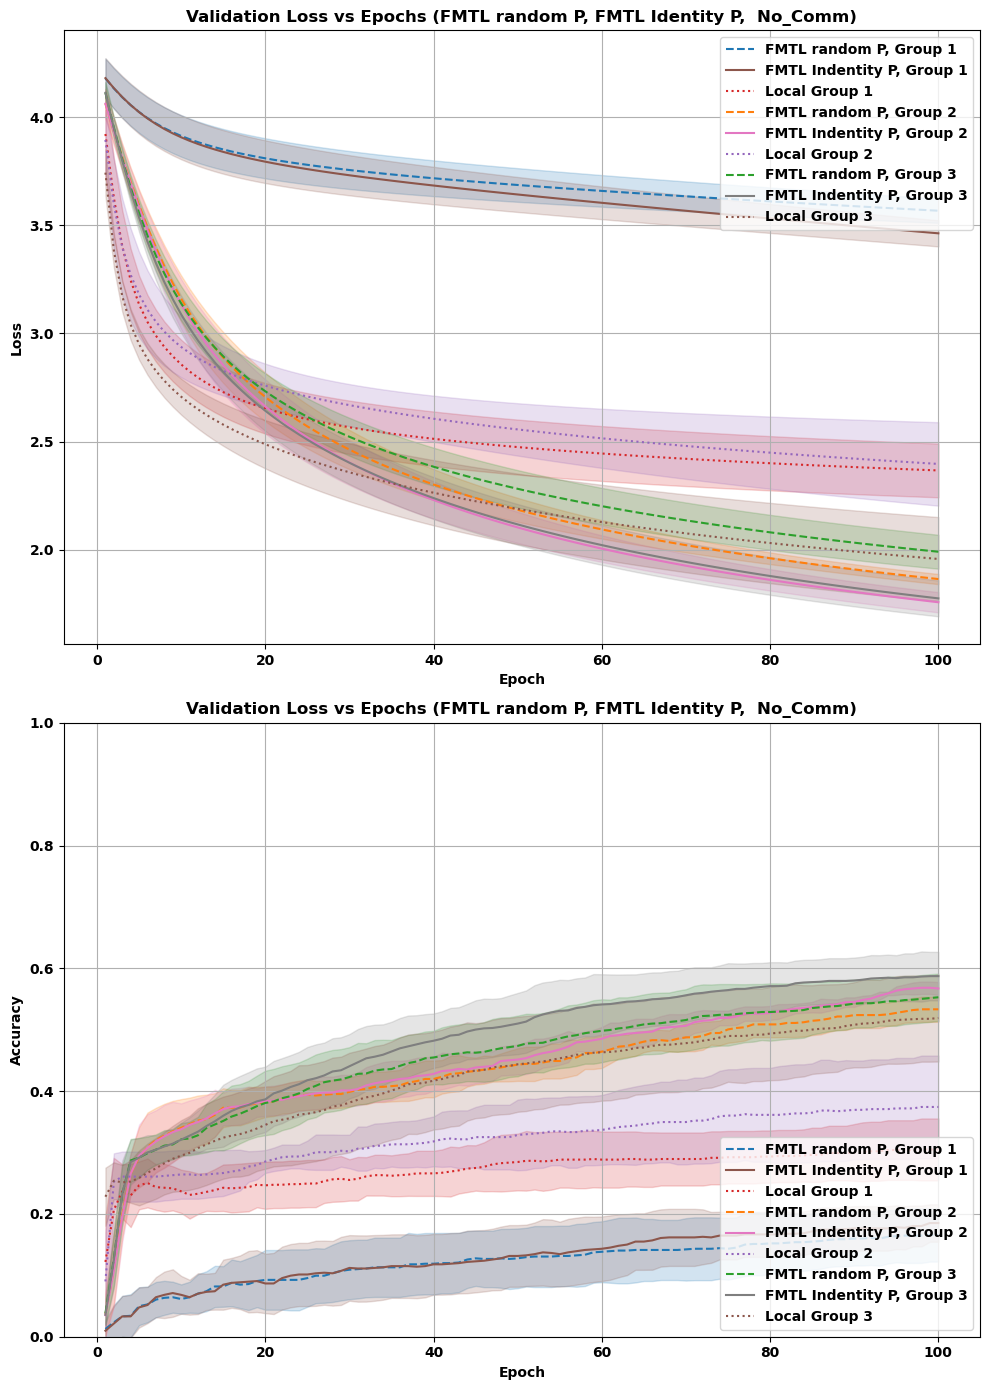

In [20]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Define the path to the metrics files
metrics_directory = "./"
fmtl_metrics_file = f'{metrics_directory}FMTL_metrics_New_graph_0_2_FL_random_P.json'
no_comm_metrics_file = f'{metrics_directory}No_Comm_Metrics_20.json'
new_metric_file = f'{metrics_directory}FMTL_metrics_New_graph_0_2_FL_eye_P.json'

# Load the metrics from all JSON files
with open(fmtl_metrics_file, 'r') as f:
    fmtl_metrics = json.load(f)

with open(no_comm_metrics_file, 'r') as f:
    no_comm_metrics = json.load(f)

with open(new_metric_file, 'r') as f:
    new_metrics = json.load(f)

# Convert metrics to numpy arrays for easy manipulation
fmtl_group_train_loss_histories = {k: np.array(v) for k, v in fmtl_metrics['group_train_loss_mean'].items()}
fmtl_group_val_loss_histories = {k: np.array(v) for k, v in fmtl_metrics['group_val_loss_mean'].items()}
fmtl_group_val_accuracy_histories = {k: np.array(v) for k, v in fmtl_metrics['group_val_acc_mean'].items()}

no_comm_group_val_loss_histories = {k: np.array(v) for k, v in no_comm_metrics['group_val_loss_mean'].items()}
no_comm_group_val_accuracy_histories = {k: np.array(v) for k, v in no_comm_metrics['group_val_acc_mean'].items()}

new_group_val_loss_histories = {k: np.array(v) for k, v in new_metrics['group_val_loss_mean'].items()}
new_group_val_accuracy_histories = {k: np.array(v) for k, v in new_metrics['group_val_acc_mean'].items()}

# Now load std values directly from the dictionary
fmtl_group_val_loss_std = {k: np.array(v) for k, v in fmtl_metrics['group_val_loss_std'].items()}
fmtl_group_val_acc_std = {k: np.array(v) for k, v in fmtl_metrics['group_val_acc_std'].items()}

no_comm_group_val_loss_std = {k: np.array(v) for k, v in no_comm_metrics['group_val_loss_std'].items()}
no_comm_group_val_acc_std = {k: np.array(v) for k, v in no_comm_metrics['group_val_acc_std'].items()}

new_group_val_loss_std = {k: np.array(v) for k, v in new_metrics['group_val_loss_std'].items()}
new_group_val_acc_std = {k: np.array(v) for k, v in new_metrics['group_val_acc_std'].items()}

# Plotting
plt.figure(figsize=(10, 14))

# Validation Loss
plt.subplot(2, 1, 1)
for group in ['1', '2', '3']:
    # Plot FMTL
    plt.plot(range(1, len(fmtl_group_val_loss_histories[group]) + 1), fmtl_group_val_loss_histories[group], label=f"FMTL random P, Group {group}", linestyle="dashed", color=f'C{int(group)-1}')
    plt.fill_between(range(1, len(fmtl_group_val_loss_histories[group]) + 1), 
                     fmtl_group_val_loss_histories[group] - fmtl_group_val_loss_std[group], 
                     fmtl_group_val_loss_histories[group] + fmtl_group_val_loss_std[group], 
                     alpha=0.2, color=f'C{int(group)-1}')

        # Plot New Metric
    plt.plot(range(1, len(new_group_val_loss_histories[group]) + 1), new_group_val_loss_histories[group], label=f"FMTL Indentity P, Group {group}", linestyle="solid", color=f'C{int(group)+4}')
    plt.fill_between(range(1, len(new_group_val_loss_histories[group]) + 1), 
                     new_group_val_loss_histories[group] - new_group_val_loss_std[group], 
                     new_group_val_loss_histories[group] + new_group_val_loss_std[group], 
                     alpha=0.2, color=f'C{int(group)+4}')

    # Plot No_Comm
    plt.plot(range(1, len(no_comm_group_val_loss_histories[group]) + 1), no_comm_group_val_loss_histories[group], label=f"Local Group {group}", linestyle="dotted", color=f'C{int(group)+2}')
    plt.fill_between(range(1, len(no_comm_group_val_loss_histories[group]) + 1), 
                     no_comm_group_val_loss_histories[group] - no_comm_group_val_loss_std[group], 
                     no_comm_group_val_loss_histories[group] + no_comm_group_val_loss_std[group], 
                     alpha=0.2, color=f'C{int(group)+2}')



plt.title("Validation Loss vs Epochs (FMTL random P, FMTL Identity P,  No_Comm)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='upper right')
plt.grid()

# Validation Accuracy
plt.subplot(2, 1, 2)
for group in ['1', '2', '3']:
    # Plot FMTL
    plt.plot(range(1, len(fmtl_group_val_accuracy_histories[group]) + 1), fmtl_group_val_accuracy_histories[group], label=f"FMTL random P, Group {group}", linestyle="dashed", color=f'C{int(group)-1}')
    plt.fill_between(range(1, len(fmtl_group_val_accuracy_histories[group]) + 1), 
                     fmtl_group_val_accuracy_histories[group] - fmtl_group_val_acc_std[group], 
                     fmtl_group_val_accuracy_histories[group] + fmtl_group_val_acc_std[group], 
                     alpha=0.2, color=f'C{int(group)-1}')
    # Plot New Metric
    plt.plot(range(1, len(new_group_val_accuracy_histories[group]) + 1), new_group_val_accuracy_histories[group], label=f"FMTL Indentity P, Group {group}", linestyle="solid", color=f'C{int(group)+4}')
    plt.fill_between(range(1, len(new_group_val_accuracy_histories[group]) + 1), 
                     new_group_val_accuracy_histories[group] - new_group_val_acc_std[group], 
                     new_group_val_accuracy_histories[group] + new_group_val_acc_std[group], 
                     alpha=0.2, color=f'C{int(group)+4}')
    # Plot No_Comm
    plt.plot(range(1, len(no_comm_group_val_accuracy_histories[group]) + 1), no_comm_group_val_accuracy_histories[group], label=f"Local Group {group}", linestyle="dotted", color=f'C{int(group)+2}')
    plt.fill_between(range(1, len(no_comm_group_val_accuracy_histories[group]) + 1), 
                     no_comm_group_val_accuracy_histories[group] - no_comm_group_val_acc_std[group], 
                     no_comm_group_val_accuracy_histories[group] + no_comm_group_val_acc_std[group], 
                     alpha=0.2, color=f'C{int(group)+2}')



plt.title("Validation Loss vs Epochs (FMTL random P, FMTL Identity P,  No_Comm)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.grid()

plt.tight_layout()

plt.savefig('validation_acc_loss_FMTL_Local_random_vs_eye.png')

plt.show()


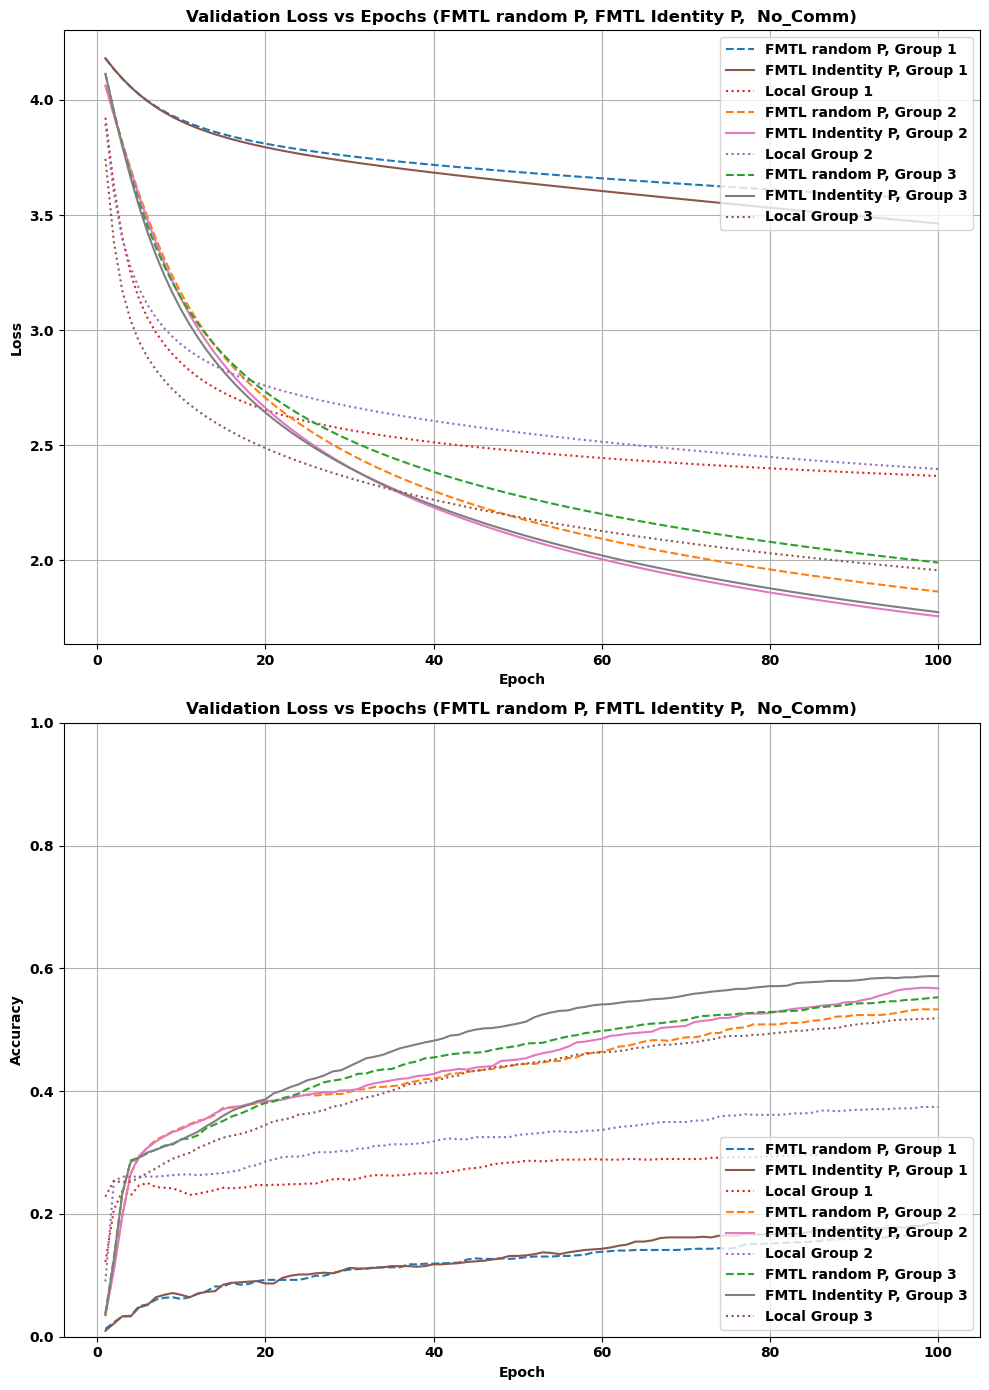

In [23]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Define the path to the metrics files
metrics_directory = "./"
fmtl_metrics_file = f'{metrics_directory}FMTL_metrics_New_graph_0_2_FL_random_P.json'
no_comm_metrics_file = f'{metrics_directory}No_Comm_Metrics_20.json'
new_metric_file = f'{metrics_directory}FMTL_metrics_New_graph_0_2_FL_eye_P.json'

# Load the metrics from all JSON files
with open(fmtl_metrics_file, 'r') as f:
    fmtl_metrics = json.load(f)

with open(no_comm_metrics_file, 'r') as f:
    no_comm_metrics = json.load(f)

with open(new_metric_file, 'r') as f:
    new_metrics = json.load(f)

# Convert metrics to numpy arrays for easy manipulation
fmtl_group_train_loss_histories = {k: np.array(v) for k, v in fmtl_metrics['group_train_loss_mean'].items()}
fmtl_group_val_loss_histories = {k: np.array(v) for k, v in fmtl_metrics['group_val_loss_mean'].items()}
fmtl_group_val_accuracy_histories = {k: np.array(v) for k, v in fmtl_metrics['group_val_acc_mean'].items()}

no_comm_group_val_loss_histories = {k: np.array(v) for k, v in no_comm_metrics['group_val_loss_mean'].items()}
no_comm_group_val_accuracy_histories = {k: np.array(v) for k, v in no_comm_metrics['group_val_acc_mean'].items()}

new_group_val_loss_histories = {k: np.array(v) for k, v in new_metrics['group_val_loss_mean'].items()}
new_group_val_accuracy_histories = {k: np.array(v) for k, v in new_metrics['group_val_acc_mean'].items()}

# Now load std values directly from the dictionary
fmtl_group_val_loss_std = {k: np.array(v) for k, v in fmtl_metrics['group_val_loss_std'].items()}
fmtl_group_val_acc_std = {k: np.array(v) for k, v in fmtl_metrics['group_val_acc_std'].items()}

no_comm_group_val_loss_std = {k: np.array(v) for k, v in no_comm_metrics['group_val_loss_std'].items()}
no_comm_group_val_acc_std = {k: np.array(v) for k, v in no_comm_metrics['group_val_acc_std'].items()}

new_group_val_loss_std = {k: np.array(v) for k, v in new_metrics['group_val_loss_std'].items()}
new_group_val_acc_std = {k: np.array(v) for k, v in new_metrics['group_val_acc_std'].items()}

# Plotting
plt.figure(figsize=(10, 14))

# Validation Loss
plt.subplot(2, 1, 1)
for group in ['1', '2', '3']:
    # Plot FMTL
    plt.plot(range(1, len(fmtl_group_val_loss_histories[group]) + 1), fmtl_group_val_loss_histories[group], label=f"FMTL random P, Group {group}", linestyle="dashed", color=f'C{int(group)-1}')
    #plt.fill_between(range(1, len(fmtl_group_val_loss_histories[group]) + 1), 
    #                 fmtl_group_val_loss_histories[group] - fmtl_group_val_loss_std[group], 
    #                 fmtl_group_val_loss_histories[group] + fmtl_group_val_loss_std[group], 
    #                 alpha=0.2, color=f'C{int(group)-1}')

        # Plot New Metric
    plt.plot(range(1, len(new_group_val_loss_histories[group]) + 1), new_group_val_loss_histories[group], label=f"FMTL Indentity P, Group {group}", linestyle="solid", color=f'C{int(group)+4}')
    #plt.fill_between(range(1, len(new_group_val_loss_histories[group]) + 1), 
    #                 new_group_val_loss_histories[group] - new_group_val_loss_std[group], 
    #                 new_group_val_loss_histories[group] + new_group_val_loss_std[group], 
    #                 alpha=0.2, color=f'C{int(group)+4}')

    # Plot No_Comm
    plt.plot(range(1, len(no_comm_group_val_loss_histories[group]) + 1), no_comm_group_val_loss_histories[group], label=f"Local Group {group}", linestyle="dotted", color=f'C{int(group)+2}')
    #plt.fill_between(range(1, len(no_comm_group_val_loss_histories[group]) + 1), 
    #                 no_comm_group_val_loss_histories[group] - no_comm_group_val_loss_std[group], 
    #                 no_comm_group_val_loss_histories[group] + no_comm_group_val_loss_std[group], 
    #                 alpha=0.2, color=f'C{int(group)+2}')



plt.title("Validation Loss vs Epochs (FMTL random P, FMTL Identity P,  No_Comm)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='upper right')
plt.grid()

# Validation Accuracy
plt.subplot(2, 1, 2)
for group in ['1', '2', '3']:
    # Plot FMTL
    plt.plot(range(1, len(fmtl_group_val_accuracy_histories[group]) + 1), fmtl_group_val_accuracy_histories[group], label=f"FMTL random P, Group {group}", linestyle="dashed", color=f'C{int(group)-1}')
    #plt.fill_between(range(1, len(fmtl_group_val_accuracy_histories[group]) + 1), 
    #                 fmtl_group_val_accuracy_histories[group] - fmtl_group_val_acc_std[group], 
    #                 fmtl_group_val_accuracy_histories[group] + fmtl_group_val_acc_std[group], 
    #                 alpha=0.2, color=f'C{int(group)-1}')
    # Plot New Metric
    plt.plot(range(1, len(new_group_val_accuracy_histories[group]) + 1), new_group_val_accuracy_histories[group], label=f"FMTL Indentity P, Group {group}", linestyle="solid", color=f'C{int(group)+4}')
    #plt.fill_between(range(1, len(new_group_val_accuracy_histories[group]) + 1), 
    #                 new_group_val_accuracy_histories[group] - new_group_val_acc_std[group], 
    #                 new_group_val_accuracy_histories[group] + new_group_val_acc_std[group], 
    #                 alpha=0.2, color=f'C{int(group)+4}')
    # Plot No_Comm
    plt.plot(range(1, len(no_comm_group_val_accuracy_histories[group]) + 1), no_comm_group_val_accuracy_histories[group], label=f"Local Group {group}", linestyle="dotted", color=f'C{int(group)+2}')
    #plt.fill_between(range(1, len(no_comm_group_val_accuracy_histories[group]) + 1), 
    #                 no_comm_group_val_accuracy_histories[group] - no_comm_group_val_acc_std[group], 
    #                 no_comm_group_val_accuracy_histories[group] + no_comm_group_val_acc_std[group], 
    #                 alpha=0.2, color=f'C{int(group)+2}')



plt.title("Validation Loss vs Epochs (FMTL random P, FMTL Identity P,  No_Comm)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.grid()

plt.tight_layout()

plt.savefig('validation_acc_loss_FMTL_Local_random_vs_eye_mean.png')

plt.show()


Percentage Improvements over No_Comm:
Group 1:
  FMTL random P: -45.69%
  FMTL identity P: -39.30%
Group 2:
  FMTL random P: 42.50%
  FMTL identity P: 51.56%
Group 3:
  FMTL random P: 6.51%
  FMTL identity P: 13.14%


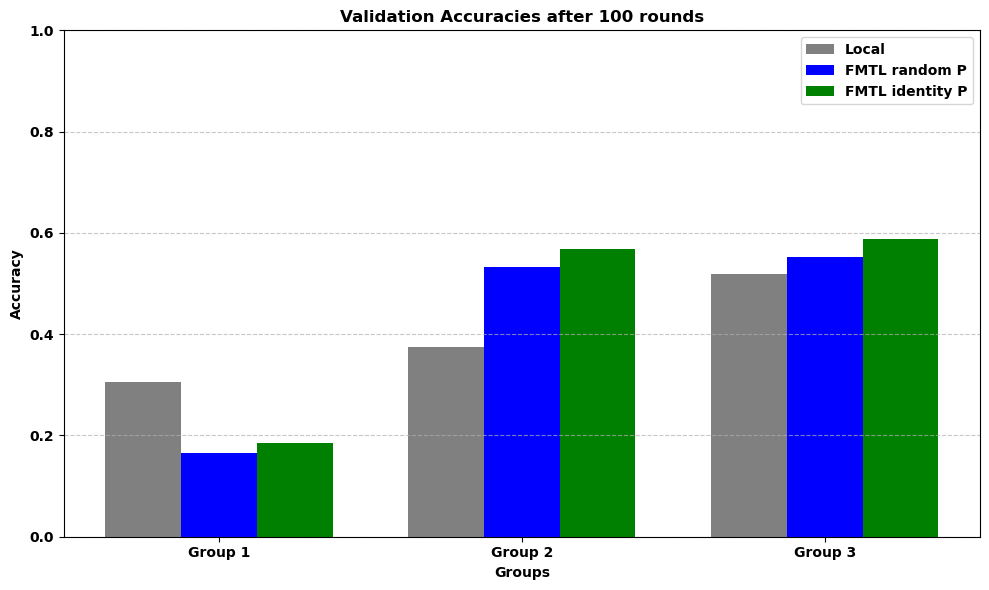

In [25]:
# Extract last accuracies
last_fmtl_accuracies = {group: fmtl_group_val_accuracy_histories[group][-1] for group in ['1', '2', '3']}
last_new_accuracies = {group: new_group_val_accuracy_histories[group][-1] for group in ['1', '2', '3']}
last_no_comm_accuracies = {group: no_comm_group_val_accuracy_histories[group][-1] for group in ['1', '2', '3']}

# Calculate percentage differences compared to No_Comm
percentage_improvements_fmtl = {group: 100 * (last_fmtl_accuracies[group] - last_no_comm_accuracies[group]) / last_no_comm_accuracies[group]
                                for group in ['1', '2', '3']}
percentage_improvements_new = {group: 100 * (last_new_accuracies[group] - last_no_comm_accuracies[group]) / last_no_comm_accuracies[group]
                               for group in ['1', '2', '3']}

# Print the percentage improvements
print("Percentage Improvements over No_Comm:")
for group in ['1', '2', '3']:
    print(f"Group {group}:")
    print(f"  FMTL random P: {percentage_improvements_fmtl[group]:.2f}%")
    print(f"  FMTL identity P: {percentage_improvements_new[group]:.2f}%")

# Bar plot of last accuracies
groups = ['1', '2', '3']
bar_width = 0.25
x = np.arange(len(groups))

fmtl_acc_values = [last_fmtl_accuracies[group] for group in groups]
new_acc_values = [last_new_accuracies[group] for group in groups]
no_comm_acc_values = [last_no_comm_accuracies[group] for group in groups]

plt.figure(figsize=(10, 6))

# Plot bars
plt.bar(x - bar_width, no_comm_acc_values, width=bar_width, label='Local', color='gray')
plt.bar(x, fmtl_acc_values, width=bar_width, label='FMTL random P', color='blue')
plt.bar(x + bar_width, new_acc_values, width=bar_width, label='FMTL identity P', color='green')

# Add labels and legend
plt.xlabel('Groups')
plt.ylabel('Accuracy')
plt.title('Validation Accuracies after 100 rounds')
plt.xticks(x, [f"Group {group}" for group in groups])
plt.ylim([0, 1])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save and show the plot
plt.tight_layout()
plt.savefig('final_accuracies_bar_chart.png')
plt.show()


# 200 rounds

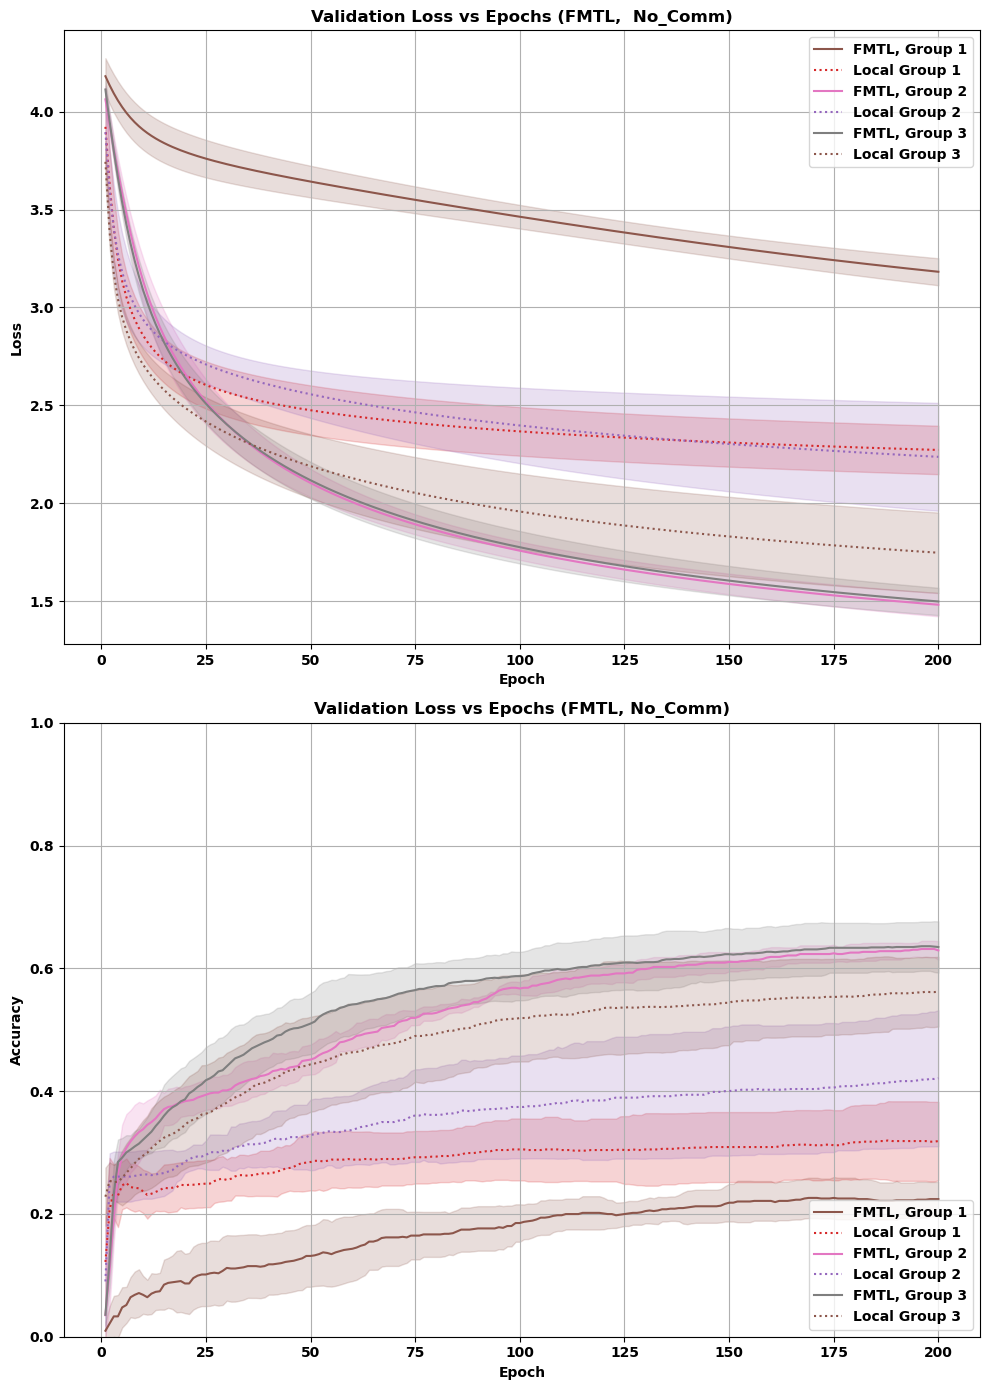

In [8]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Define the path to the metrics files
metrics_directory = "./"
no_comm_metrics_file = f'{metrics_directory}No_Comm_Metrics_20.json'
new_metric_file = f'{metrics_directory}FMTL_metrics_New_graph_0_2_FL_eye_P.json'

# Load the metrics from all JSON files
#with open(fmtl_metrics_file, 'r') as f:
#    fmtl_metrics = json.load(f)

with open(no_comm_metrics_file, 'r') as f:
    no_comm_metrics = json.load(f)

with open(new_metric_file, 'r') as f:
    new_metrics = json.load(f)

# Convert metrics to numpy arrays for easy manipulation
#fmtl_group_train_loss_histories = {k: np.array(v) for k, v in fmtl_metrics['group_train_loss_mean'].items()}
#fmtl_group_val_loss_histories = {k: np.array(v) for k, v in fmtl_metrics['group_val_loss_mean'].items()}
#fmtl_group_val_accuracy_histories = {k: np.array(v) for k, v in fmtl_metrics['group_val_acc_mean'].items()}

no_comm_group_val_loss_histories = {k: np.array(v) for k, v in no_comm_metrics['group_val_loss_mean'].items()}
no_comm_group_val_accuracy_histories = {k: np.array(v) for k, v in no_comm_metrics['group_val_acc_mean'].items()}

new_group_val_loss_histories = {k: np.array(v) for k, v in new_metrics['group_val_loss_mean'].items()}
new_group_val_accuracy_histories = {k: np.array(v) for k, v in new_metrics['group_val_acc_mean'].items()}

# Now load std values directly from the dictionary
#fmtl_group_val_loss_std = {k: np.array(v) for k, v in fmtl_metrics['group_val_loss_std'].items()}
#fmtl_group_val_acc_std = {k: np.array(v) for k, v in fmtl_metrics['group_val_acc_std'].items()}

no_comm_group_val_loss_std = {k: np.array(v) for k, v in no_comm_metrics['group_val_loss_std'].items()}
no_comm_group_val_acc_std = {k: np.array(v) for k, v in no_comm_metrics['group_val_acc_std'].items()}

new_group_val_loss_std = {k: np.array(v) for k, v in new_metrics['group_val_loss_std'].items()}
new_group_val_acc_std = {k: np.array(v) for k, v in new_metrics['group_val_acc_std'].items()}

# Plotting
plt.figure(figsize=(10, 14))

# Validation Loss
plt.subplot(2, 1, 1)
for group in ['1', '2', '3']:
    # Plot FMTL
    #plt.plot(range(1, len(fmtl_group_val_loss_histories[group]) + 1), fmtl_group_val_loss_histories[group], label=f"FMTL random P, Group {group}", linestyle="dashed", color=f'C{int(group)-1}')
    #plt.fill_between(range(1, len(fmtl_group_val_loss_histories[group]) + 1), 
    #                 fmtl_group_val_loss_histories[group] - fmtl_group_val_loss_std[group], 
    #                 fmtl_group_val_loss_histories[group] + fmtl_group_val_loss_std[group], 
    #                 alpha=0.2, color=f'C{int(group)-1}')

        # Plot New Metric
    plt.plot(range(1, len(new_group_val_loss_histories[group]) + 1), new_group_val_loss_histories[group], label=f"FMTL, Group {group}", linestyle="solid", color=f'C{int(group)+4}')
    plt.fill_between(range(1, len(new_group_val_loss_histories[group]) + 1), 
                     new_group_val_loss_histories[group] - new_group_val_loss_std[group], 
                     new_group_val_loss_histories[group] + new_group_val_loss_std[group], 
                     alpha=0.2, color=f'C{int(group)+4}')

    # Plot No_Comm
    plt.plot(range(1, len(no_comm_group_val_loss_histories[group]) + 1), no_comm_group_val_loss_histories[group], label=f"Local Group {group}", linestyle="dotted", color=f'C{int(group)+2}')
    plt.fill_between(range(1, len(no_comm_group_val_loss_histories[group]) + 1), 
                     no_comm_group_val_loss_histories[group] - no_comm_group_val_loss_std[group], 
                     no_comm_group_val_loss_histories[group] + no_comm_group_val_loss_std[group], 
                     alpha=0.2, color=f'C{int(group)+2}')



plt.title("Validation Loss vs Epochs (FMTL,  No_Comm)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='upper right')
plt.grid()

# Validation Accuracy
plt.subplot(2, 1, 2)
for group in ['1', '2', '3']:
    # Plot FMTL
    #plt.plot(range(1, len(fmtl_group_val_accuracy_histories[group]) + 1), fmtl_group_val_accuracy_histories[group], label=f"FMTL random P, Group {group}", linestyle="dashed", color=f'C{int(group)-1}')
    #plt.fill_between(range(1, len(fmtl_group_val_accuracy_histories[group]) + 1), 
    #                 fmtl_group_val_accuracy_histories[group] - fmtl_group_val_acc_std[group], 
    #                 fmtl_group_val_accuracy_histories[group] + fmtl_group_val_acc_std[group], 
    #                 alpha=0.2, color=f'C{int(group)-1}')
    # Plot New Metric
    plt.plot(range(1, len(new_group_val_accuracy_histories[group]) + 1), new_group_val_accuracy_histories[group], label=f"FMTL, Group {group}", linestyle="solid", color=f'C{int(group)+4}')
    plt.fill_between(range(1, len(new_group_val_accuracy_histories[group]) + 1), 
                     new_group_val_accuracy_histories[group] - new_group_val_acc_std[group], 
                     new_group_val_accuracy_histories[group] + new_group_val_acc_std[group], 
                     alpha=0.2, color=f'C{int(group)+4}')
    # Plot No_Comm
    plt.plot(range(1, len(no_comm_group_val_accuracy_histories[group]) + 1), no_comm_group_val_accuracy_histories[group], label=f"Local Group {group}", linestyle="dotted", color=f'C{int(group)+2}')
    plt.fill_between(range(1, len(no_comm_group_val_accuracy_histories[group]) + 1), 
                     no_comm_group_val_accuracy_histories[group] - no_comm_group_val_acc_std[group], 
                     no_comm_group_val_accuracy_histories[group] + no_comm_group_val_acc_std[group], 
                     alpha=0.2, color=f'C{int(group)+2}')



plt.title("Validation Loss vs Epochs (FMTL, No_Comm)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.grid()

plt.tight_layout()

plt.savefig('validation_acc_loss_FMTL_Local_vs_eye_200.png')

plt.show()


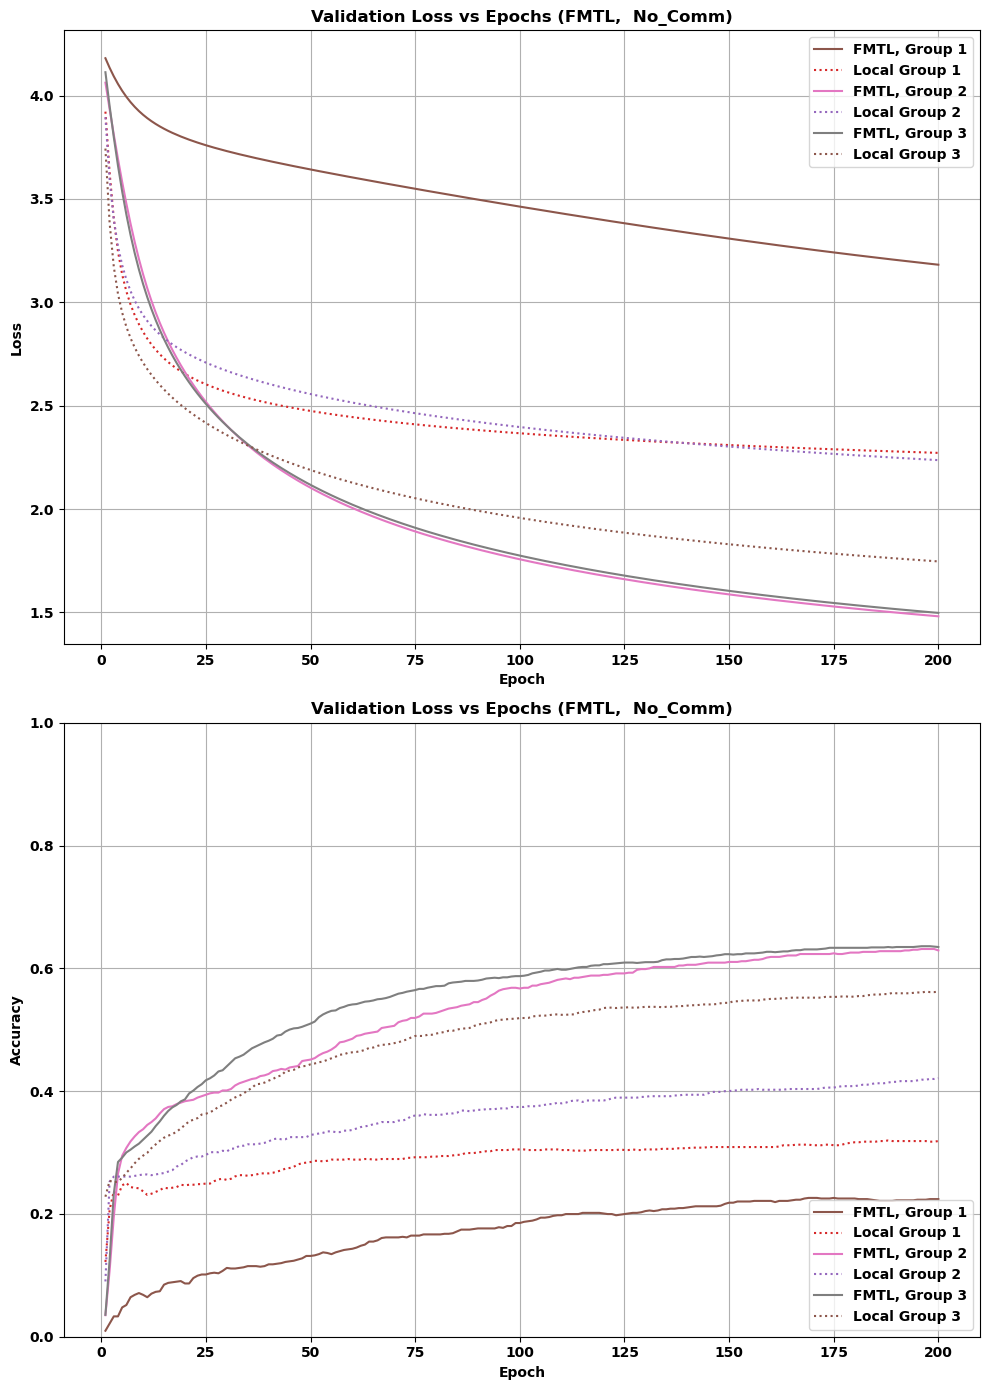

In [9]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Define the path to the metrics files
metrics_directory = "./"
fmtl_metrics_file = f'{metrics_directory}FMTL_metrics_New_graph_0_2_FL_random_P.json'
no_comm_metrics_file = f'{metrics_directory}No_Comm_Metrics_20.json'
new_metric_file = f'{metrics_directory}FMTL_metrics_New_graph_0_2_FL_eye_P.json'

# Load the metrics from all JSON files
with open(fmtl_metrics_file, 'r') as f:
    fmtl_metrics = json.load(f)

with open(no_comm_metrics_file, 'r') as f:
    no_comm_metrics = json.load(f)

with open(new_metric_file, 'r') as f:
    new_metrics = json.load(f)

# Convert metrics to numpy arrays for easy manipulation

no_comm_group_val_loss_histories = {k: np.array(v) for k, v in no_comm_metrics['group_val_loss_mean'].items()}
no_comm_group_val_accuracy_histories = {k: np.array(v) for k, v in no_comm_metrics['group_val_acc_mean'].items()}

new_group_val_loss_histories = {k: np.array(v) for k, v in new_metrics['group_val_loss_mean'].items()}
new_group_val_accuracy_histories = {k: np.array(v) for k, v in new_metrics['group_val_acc_mean'].items()}



no_comm_group_val_loss_std = {k: np.array(v) for k, v in no_comm_metrics['group_val_loss_std'].items()}
no_comm_group_val_acc_std = {k: np.array(v) for k, v in no_comm_metrics['group_val_acc_std'].items()}

new_group_val_loss_std = {k: np.array(v) for k, v in new_metrics['group_val_loss_std'].items()}
new_group_val_acc_std = {k: np.array(v) for k, v in new_metrics['group_val_acc_std'].items()}

# Plotting
plt.figure(figsize=(10, 14))

# Validation Loss
plt.subplot(2, 1, 1)
for group in ['1', '2', '3']:
    # Plot FMTL
    #plt.plot(range(1, len(fmtl_group_val_loss_histories[group]) + 1), fmtl_group_val_loss_histories[group], label=f"FMTL random P, Group {group}", linestyle="dashed", color=f'C{int(group)-1}')
    #plt.fill_between(range(1, len(fmtl_group_val_loss_histories[group]) + 1), 
    #                 fmtl_group_val_loss_histories[group] - fmtl_group_val_loss_std[group], 
    #                 fmtl_group_val_loss_histories[group] + fmtl_group_val_loss_std[group], 
    #                 alpha=0.2, color=f'C{int(group)-1}')

        # Plot New Metric
    plt.plot(range(1, len(new_group_val_loss_histories[group]) + 1), new_group_val_loss_histories[group], label=f"FMTL, Group {group}", linestyle="solid", color=f'C{int(group)+4}')
    #plt.fill_between(range(1, len(new_group_val_loss_histories[group]) + 1), 
    #                 new_group_val_loss_histories[group] - new_group_val_loss_std[group], 
    #                 new_group_val_loss_histories[group] + new_group_val_loss_std[group], 
    #                 alpha=0.2, color=f'C{int(group)+4}')

    # Plot No_Comm
    plt.plot(range(1, len(no_comm_group_val_loss_histories[group]) + 1), no_comm_group_val_loss_histories[group], label=f"Local Group {group}", linestyle="dotted", color=f'C{int(group)+2}')
    #plt.fill_between(range(1, len(no_comm_group_val_loss_histories[group]) + 1), 
    #                 no_comm_group_val_loss_histories[group] - no_comm_group_val_loss_std[group], 
    #                 no_comm_group_val_loss_histories[group] + no_comm_group_val_loss_std[group], 
    #                 alpha=0.2, color=f'C{int(group)+2}')



plt.title("Validation Loss vs Epochs (FMTL,  No_Comm)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='upper right')
plt.grid()

# Validation Accuracy
plt.subplot(2, 1, 2)
for group in ['1', '2', '3']:
    # Plot FMTL
    #plt.plot(range(1, len(fmtl_group_val_accuracy_histories[group]) + 1), fmtl_group_val_accuracy_histories[group], label=f"FMTL random P, Group {group}", linestyle="dashed", color=f'C{int(group)-1}')
    #plt.fill_between(range(1, len(fmtl_group_val_accuracy_histories[group]) + 1), 
    #                 fmtl_group_val_accuracy_histories[group] - fmtl_group_val_acc_std[group], 
    #                 fmtl_group_val_accuracy_histories[group] + fmtl_group_val_acc_std[group], 
    #                 alpha=0.2, color=f'C{int(group)-1}')
    # Plot New Metric
    plt.plot(range(1, len(new_group_val_accuracy_histories[group]) + 1), new_group_val_accuracy_histories[group], label=f"FMTL, Group {group}", linestyle="solid", color=f'C{int(group)+4}')
    #plt.fill_between(range(1, len(new_group_val_accuracy_histories[group]) + 1), 
    #                 new_group_val_accuracy_histories[group] - new_group_val_acc_std[group], 
    #                 new_group_val_accuracy_histories[group] + new_group_val_acc_std[group], 
    #                 alpha=0.2, color=f'C{int(group)+4}')
    # Plot No_Comm
    plt.plot(range(1, len(no_comm_group_val_accuracy_histories[group]) + 1), no_comm_group_val_accuracy_histories[group], label=f"Local Group {group}", linestyle="dotted", color=f'C{int(group)+2}')
    #plt.fill_between(range(1, len(no_comm_group_val_accuracy_histories[group]) + 1), 
    #                 no_comm_group_val_accuracy_histories[group] - no_comm_group_val_acc_std[group], 
    #                 no_comm_group_val_accuracy_histories[group] + no_comm_group_val_acc_std[group], 
    #                 alpha=0.2, color=f'C{int(group)+2}')



plt.title("Validation Loss vs Epochs (FMTL,  No_Comm)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.grid()

plt.tight_layout()

plt.savefig('validation_acc_loss_FMTL_Local_vs_eye_mean_200.png')

plt.show()


Percentage Improvements over No_Comm:
Group 1:
  FMTL: -29.66%
Group 2:
  FMTL: 49.44%
Group 3:
  FMTL: 12.95%


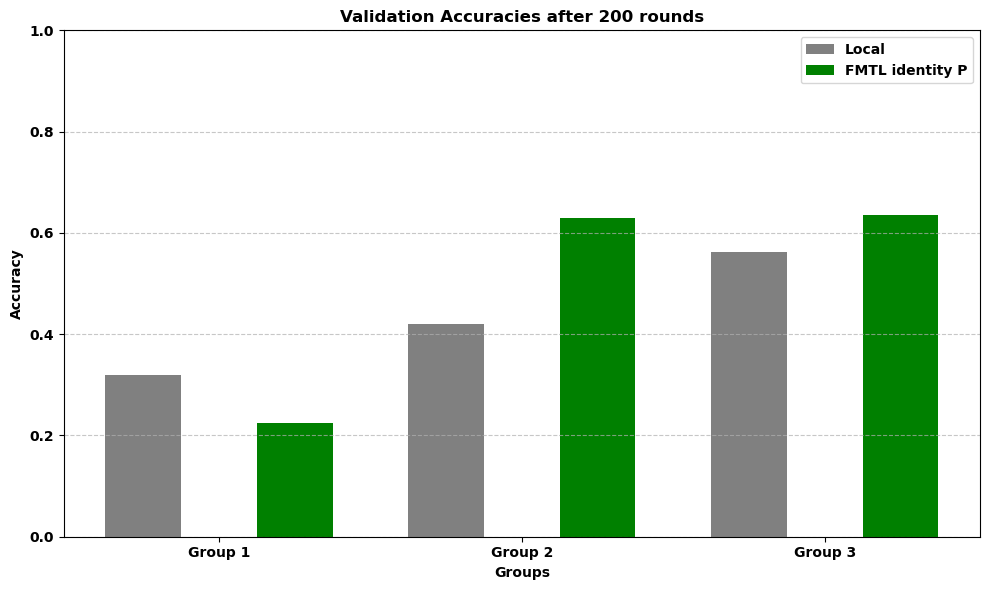

In [21]:
# Extract last accuracies
#last_fmtl_accuracies = {group: fmtl_group_val_accuracy_histories[group][-1] for group in ['1', '2', '3']}
last_new_accuracies = {group: new_group_val_accuracy_histories[group][-1] for group in ['1', '2', '3']}
last_no_comm_accuracies = {group: no_comm_group_val_accuracy_histories[group][-1] for group in ['1', '2', '3']}

# Calculate percentage differences compared to No_Comm
#percentage_improvements_fmtl = {group: 100 * (last_fmtl_accuracies[group] - last_no_comm_accuracies[group]) / last_no_comm_accuracies[group]
#                                for group in ['1', '2', '3']}
percentage_improvements_new = {group: 100 * (last_new_accuracies[group] - last_no_comm_accuracies[group]) / last_no_comm_accuracies[group]
                               for group in ['1', '2', '3']}

# Print the percentage improvements
print("Percentage Improvements over No_Comm:")
for group in ['1', '2', '3']:
    print(f"Group {group}:")
    #print(f"  FMTL random P: {percentage_improvements_fmtl[group]:.2f}%")
    print(f"  FMTL: {percentage_improvements_new[group]:.2f}%")

# Bar plot of last accuracies
groups = ['1', '2', '3']
bar_width = 0.25
x = np.arange(len(groups))

#fmtl_acc_values = [last_fmtl_accuracies[group] for group in groups]
new_acc_values = [last_new_accuracies[group] for group in groups]
no_comm_acc_values = [last_no_comm_accuracies[group] for group in groups]

plt.figure(figsize=(10, 6))

# Plot bars
plt.bar(x - bar_width, no_comm_acc_values, width=bar_width, label='Local', color='gray')
#plt.bar(x, fmtl_acc_values, width=bar_width, label='FMTL random P', color='blue')
plt.bar(x + bar_width, new_acc_values, width=bar_width, label='FMTL identity P', color='green')

# Add labels and legend
plt.xlabel('Groups')
plt.ylabel('Accuracy')
plt.title('Validation Accuracies after 200 rounds')
plt.xticks(x, [f"Group {group}" for group in groups])
plt.ylim([0, 1])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save and show the plot
plt.tight_layout()
plt.savefig('final_accuracies_bar_chart_200.png')
plt.show()


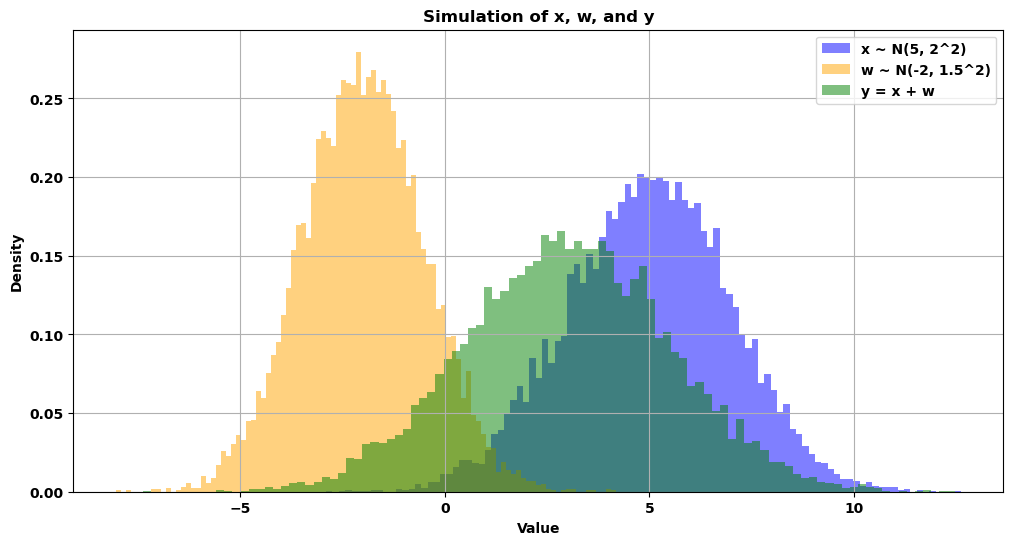

Theoretical mean of y: 3
Theoretical standard deviation of y: 2.5
Empirical mean of y: 3.0021569471302887
Empirical standard deviation of y: 2.4912988825948266


In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for x and w
mu_x, sigma_x = 5, 2  # Mean and standard deviation for x
mu_w, sigma_w = -2, 1.5  # Mean and standard deviation for w

# Number of samples to simulate
n_samples = 10000

# Simulate x and w
x = np.random.normal(mu_x, sigma_x, n_samples)
w = np.random.normal(mu_w, sigma_w, n_samples)

# Calculate y
y = x + w

# Plot histograms of x, w, and y
plt.figure(figsize=(12, 6))

plt.hist(x, bins=100, alpha=0.5, label='x ~ N(5, 2^2)', color='blue', density=True)
plt.hist(w, bins=100, alpha=0.5, label='w ~ N(-2, 1.5^2)', color='orange', density=True)
plt.hist(y, bins=100, alpha=0.5, label='y = x + w', color='green', density=True)

plt.title("Simulation of x, w, and y")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()

# Print theoretical mean and variance of y
mu_y = mu_x + mu_w
sigma_y = np.sqrt(sigma_x**2 + sigma_w**2)
print(f"Theoretical mean of y: {mu_y}")
print(f"Theoretical standard deviation of y: {sigma_y}")

# Print empirical mean and variance of y
print(f"Empirical mean of y: {np.mean(y)}")
print(f"Empirical standard deviation of y: {np.std(y)}")
